<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/first_nural_network(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
(x_train,y_train) ,(x_test,y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_n = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [ ]:
x_train = x_train/255          # For normalization(Nural network understand value between 0 & 1)

In [ ]:
x_test = x_test/255

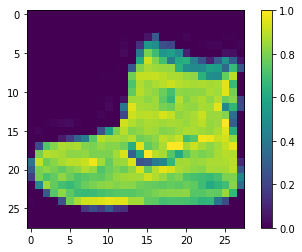

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
# Building the model with tensorflow 2.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))   # this layer transform 28x28 data into one dimension so that it can be fed to next layer
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4976 - accuracy: 0.8215 - val_loss: 0.4580 - val_accuracy: 0.8298
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3760 - accuracy: 0.8620 - val_loss: 0.3684 - val_accuracy: 0.8699
Epoch 3/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3374 - accuracy: 0.8757 - val_loss: 0.3822 - val_accuracy: 0.8664
Epoch 4/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3147 - accuracy: 0.8836 - val_loss: 0.3393 - val_accuracy: 0.8771
Epoch 5/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2957 - accuracy: 0.8903 - val_loss: 0.3494 - val_accuracy: 0.8802
Epoch 6/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2839 - accuracy: 0.8953 - val_loss: 0.3666 - val_accuracy: 0.8673
Epoch 7/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2722 - accuracy: 0.8979 - val_loss: 0.3476 - val_accurac

In [ ]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8776
0.8776000142097473


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
accuracy_score(y_test,y_pred)

0.8776

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
pred = model.predict(x_test)
pred

array([[2.82848390e-07, 1.01827176e-07, 1.21725909e-08, ...,
        1.56140449e-02, 8.52668165e-07, 9.84359443e-01],
       [7.46009846e-06, 6.77725418e-15, 9.98629212e-01, ...,
        3.03351026e-14, 1.63001190e-09, 5.62287237e-15],
       [1.10704246e-08, 1.00000000e+00, 1.01579975e-12, ...,
        3.72860851e-25, 6.38948703e-12, 7.51944452e-19],
       ...,
       [1.83079010e-05, 7.72060749e-10, 3.03415572e-06, ...,
        1.07826974e-08, 9.99958515e-01, 7.12943662e-11],
       [6.26448795e-08, 9.99989510e-01, 7.48843121e-09, ...,
        1.40780416e-14, 5.82700643e-08, 8.99318953e-11],
       [6.01203756e-05, 2.75990395e-08, 9.69850589e-06, ...,
        5.36442269e-03, 1.78743911e-04, 6.84188271e-05]], dtype=float32)

In [ ]:
pred[0]

array([2.82848390e-07, 1.01827176e-07, 1.21725909e-08, 8.90373908e-09,
       1.17083880e-08, 2.50862158e-05, 1.18063255e-07, 1.56140449e-02,
       8.52668165e-07, 9.84359443e-01], dtype=float32)

In [ ]:
np.argmax(pred[0])

9

In [ ]:
history.history

{'accuracy': [0.8215208053588867,
  0.8620208501815796,
  0.8757291436195374,
  0.8835833072662354,
  0.890291690826416,
  0.895270824432373,
  0.8979166746139526,
  0.901354193687439,
  0.9067291617393494,
  0.909375011920929],
 'loss': [0.49762967228889465,
  0.3759990930557251,
  0.33740708231925964,
  0.3146955966949463,
  0.29566478729248047,
  0.2839360237121582,
  0.27216842770576477,
  0.2612052261829376,
  0.2505018413066864,
  0.24248310923576355],
 'val_accuracy': [0.8297500014305115,
  0.8699166774749756,
  0.8664166927337646,
  0.8770833611488342,
  0.8802499771118164,
  0.8673333525657654,
  0.8744999766349792,
  0.8790833353996277,
  0.8852499723434448,
  0.8838333487510681],
 'val_loss': [0.4579624831676483,
  0.36840733885765076,
  0.38224637508392334,
  0.33929792046546936,
  0.3493858575820923,
  0.36658620834350586,
  0.3476434051990509,
  0.34675487875938416,
  0.32905852794647217,
  0.3420983850955963]}

In [ ]:
import matplotlib.pyplot as plt


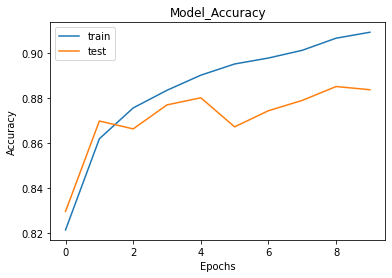

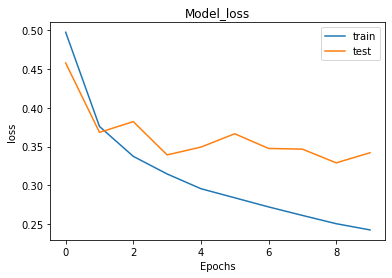

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from mlxtend.evaluate import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[736,   3,  18,  46,   7,   2, 176,   0,  12,   0],
       [  1, 971,   0,  20,   3,   0,   5,   0,   0,   0],
       [  8,   0, 728,  15, 138,   0, 109,   0,   2,   0],
       [ 12,   3,   6, 913,  38,   1,  23,   0,   4,   0],
       [  1,   0,  61,  27, 842,   0,  67,   0,   2,   0],
       [  0,   0,   0,   0,   0, 947,   0,  32,   2,  19],
       [ 67,   1,  60,  37,  77,   0, 746,   0,  12,   0],
       [  0,   0,   0,   0,   0,   7,   0, 949,   0,  44],
       [  3,   0,   0,   5,   4,   2,   6,   3, 977,   0],
       [  0,   0,   0,   0,   0,   6,   1,  26,   0, 967]])

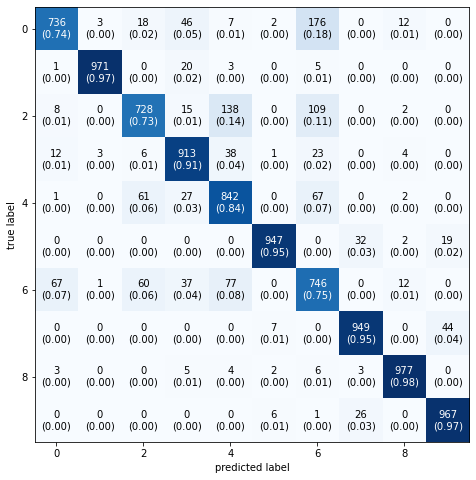

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
mat = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=mat,figsize=(8,8),show_normed=True)
plt.show()